In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from os.path import abspath, join
import sys
root_dir = abspath(join('..'))
sys.path.append(root_dir)
from glob import glob
import vaex
from utils import calculate_probs
from datetime import datetime
import matplotlib.pyplot as plt
sys.path

ImportError: cannot import name 'calculate_probs' from 'utils' (/home2/s20321005/Thesis-Project/utils/__init__.py)

In [2]:
model = 2
data = 4

# DDDM

In [3]:
def init(model):
    ndim = 33
    if model == 1:
        ndim = 33
    elif model == 2:
        ndim = 35
    else:
        raise ValueError("model must be 1 or 2")
    nwalkers = 2*ndim+2
    return (ndim, nwalkers)

ndim, nwalkers = init(model)

In [4]:
data_dir = join(root_dir, 'Data', 'MCMC', 'dddm')
chain = np.load(join(data_dir, 'data', f'chain-{model}-{data}.npy'))

locs = np.load(join(data_dir, 'data', f'locs-{model}.npy'))
scales = np.load(join(data_dir, 'data', f'scales-{model}.npy'))

zfiles = glob(join(root_dir, 'Data', 'Effective-Volume-v', '*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'Velocity-Distribution-v', 'gaia*.hdf5'))
wfiles.sort()
zfiles, wfiles

zfile = zfiles[data]
wfile = wfiles[data]
zdata = vaex.open(zfile)

zmid = zdata['z'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['err'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [5]:
probs = calculate_probs(dddm, chain, ndim, zdata, wdata, locs, scales, batch=1000)
prior_dddm = probs[:, 0]
likelihood_dddm = probs[:, 1]
posterior_dddm = probs[:, 2]
max_likelihood_dddm = np.max(likelihood_dddm)

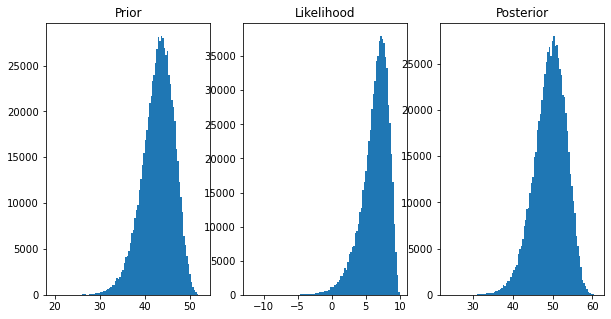

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(prior_dddm, bins=100)
ax[0].set_title('Prior')
ax[1].hist(likelihood_dddm, bins=100)
ax[1].set_title('Likelihood')
ax[2].hist(posterior_dddm, bins=100)
ax[2].set_title('Posterior')
plt.show()

In [6]:
# calculate BIC
bic = -2 * max_likelihood_dddm + ndim * np.log(3*len(zmid)+3*len(wmid))
print(f"BIC: {bic}")

BIC: 144.87824955836112


# DM

In [11]:
from hammer import dm

In [7]:
def init(model):
    ndim = 31
    if model == 1:
        ndim = 31
    elif model == 2:
        ndim = 33
    else:
        raise ValueError("model must be 1 or 2")
    nwalkers = 2*ndim+2
    return (ndim, nwalkers)

ndim, nwalkers = init(model)

In [8]:
data_dir = join(root_dir, 'Data', 'MCMC', 'dm')
chain = np.load(join(data_dir, 'data', f'chain-{model}-{data}.npy'))

locs = np.load(join(data_dir, 'data', f'locs-{model}.npy'))
scales = np.load(join(data_dir, 'data', f'scales-{model}.npy'))

zfiles = glob(join(root_dir, 'Data', 'Effective-Volume-v', '*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'Velocity-Distribution-v', 'gaia*.hdf5'))
wfiles.sort()
zfiles, wfiles

zfile = zfiles[data]
wfile = wfiles[data]
zdata = vaex.open(zfile)

zmid = zdata['z'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['err'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [12]:
probs = calculate_probs(dm, chain, ndim, zdata, wdata, locs, scales, batch=1000)
prior_dm = probs[:, 0]
likelihood_dm = probs[:, 1]
posterior_dm = probs[:, 2]
max_likelihood_dm = np.max(likelihood_dm[np.isfinite(likelihood_dm)])

In [17]:
max_likelihood_dm = np.max(likelihood_dm[np.isfinite(likelihood_dm)])

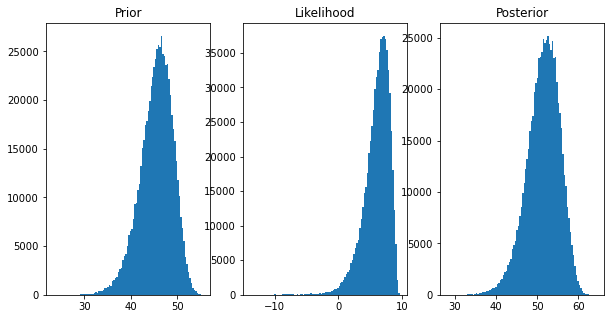

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(prior_dm[np.isfinite(prior_dm)], bins=100)
ax[0].set_title('Prior')
ax[1].hist(likelihood_dm[np.isfinite(likelihood_dm)], bins=100)
ax[1].set_title('Likelihood')
ax[2].hist(posterior_dm[np.isfinite(posterior_dm)], bins=100)
ax[2].set_title('Posterior')
plt.show()

In [18]:
# calculate BIC
bic = -2 * max_likelihood_dm + ndim * np.log(3*len(zmid)+3*len(wmid))
print(f"BIC: {bic}")

BIC: 136.18897582051775


# no

In [19]:
from hammer import no

In [20]:
def init(model):
    ndim = 30
    if model == 1:
        ndim = 30
    elif model == 2:
        ndim = 32
    else:
        raise ValueError("model must be 1 or 2")
    nwalkers = 2*ndim+2
    return (ndim, nwalkers)

ndim, nwalkers = init(model)

In [21]:
data_dir = join(root_dir, 'Data', 'MCMC', 'no')
chain = np.load(join(data_dir, 'data', f'chain-{model}-{data}.npy'))

locs = np.load(join(data_dir, 'data', f'locs-{model}.npy'))
scales = np.load(join(data_dir, 'data', f'scales-{model}.npy'))

zfiles = glob(join(root_dir, 'Data', 'Effective-Volume-v', '*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'Velocity-Distribution-v', 'gaia*.hdf5'))
wfiles.sort()
zfiles, wfiles

zfile = zfiles[data]
wfile = wfiles[data]
zdata = vaex.open(zfile)

zmid = zdata['z'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['err'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [22]:
probs = calculate_probs(no, chain, ndim, zdata, wdata, locs, scales, batch=1000)
prior_no = probs[:, 0]
prior_no = prior_no[np.isfinite(prior_no)]
likelihood_no = probs[:, 1]
likelihood_no = likelihood_no[np.isfinite(likelihood_no)]
posterior_no = probs[:, 2]
posterior_no = posterior_no[np.isfinite(posterior_no)]
max_likelihood_no = np.max(likelihood_no)

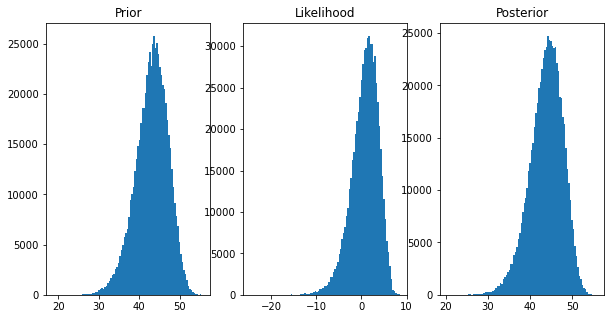

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(prior_no, bins=100)
ax[0].set_title('Prior')
ax[1].hist(likelihood_no, bins=100)
ax[1].set_title('Likelihood')
ax[2].hist(posterior_no, bins=100)
ax[2].set_title('Posterior')
plt.show()

In [24]:
# calculate BIC
bic = -2 * max_likelihood_no + ndim * np.log(3*len(zmid)+3*len(wmid))
print(f"BIC: {bic}")

BIC: 133.763236446943


# mond

In [25]:
from hammer import mond

In [26]:
def init(model):
    ndim = 31
    if model == 1:
        ndim = 31
    elif model == 2:
        ndim = 33
    else:
        raise ValueError("model must be 1 or 2")
    nwalkers = 2*ndim+2
    return (ndim, nwalkers)

ndim, nwalkers = init(model)

In [27]:
data_dir = join(root_dir, 'Data', 'MCMC', 'mond')
chain = np.load(join(data_dir, 'data', f'chain-{model}-{data}.npy'))

locs = np.load(join(data_dir, 'data', f'locs-{model}.npy'))
scales = np.load(join(data_dir, 'data', f'scales-{model}.npy'))

zfiles = glob(join(root_dir, 'Data', 'Effective-Volume-v', '*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'Velocity-Distribution-v', 'gaia*.hdf5'))
wfiles.sort()
zfiles, wfiles

zfile = zfiles[data]
wfile = wfiles[data]
zdata = vaex.open(zfile)

zmid = zdata['z'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['err'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [30]:
probs = calculate_probs(mond, chain, ndim, zdata, wdata, locs, scales, batch=1000)
prior_mond = probs[:, 0]
prior_mond = prior_mond[np.isfinite(prior_mond)]
likelihood_mond = probs[:, 1]
likelihood_mond = likelihood_mond[np.isfinite(likelihood_mond)]
posterior_mond = probs[:, 2]
posterior_mond = posterior_mond[np.isfinite(posterior_mond)]
max_likelihood_mond = np.max(likelihood_mond)
max_likelihood_mond

9.982794091676737

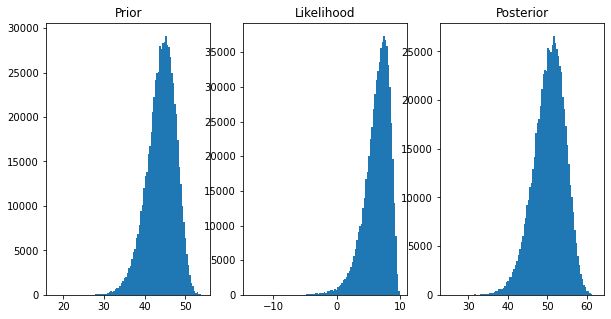

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(prior_mond, bins=100)
ax[0].set_title('Prior')
ax[1].hist(likelihood_mond, bins=100)
ax[1].set_title('Likelihood')
ax[2].hist(posterior_mond, bins=100)
ax[2].set_title('Posterior')
plt.show()

In [32]:
# calculate BIC
bic = -2 * max_likelihood_mond + ndim * np.log(3*len(zmid)+3*len(wmid))
print(f"BIC: {bic}")

BIC: 135.44890845995354
